# AI-Resume Scanner

## 1. Data Preprocessing

### 1.1 Imports

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### 1.2 Load Dataset

In [33]:
# Load the dataset
df = pd.read_csv('../data/UpdatedResumeDataSet.csv')
df

Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]

### 1.3 Exploring the Dataset

In [34]:
# Check NA values
df.isna().sum()

Category    0
Resume      0
dtype: int64

In [35]:
# Value Counts
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [36]:
df.dtypes

Category    object
Resume      object
dtype: object

In [37]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

### 1.4 Visualizations

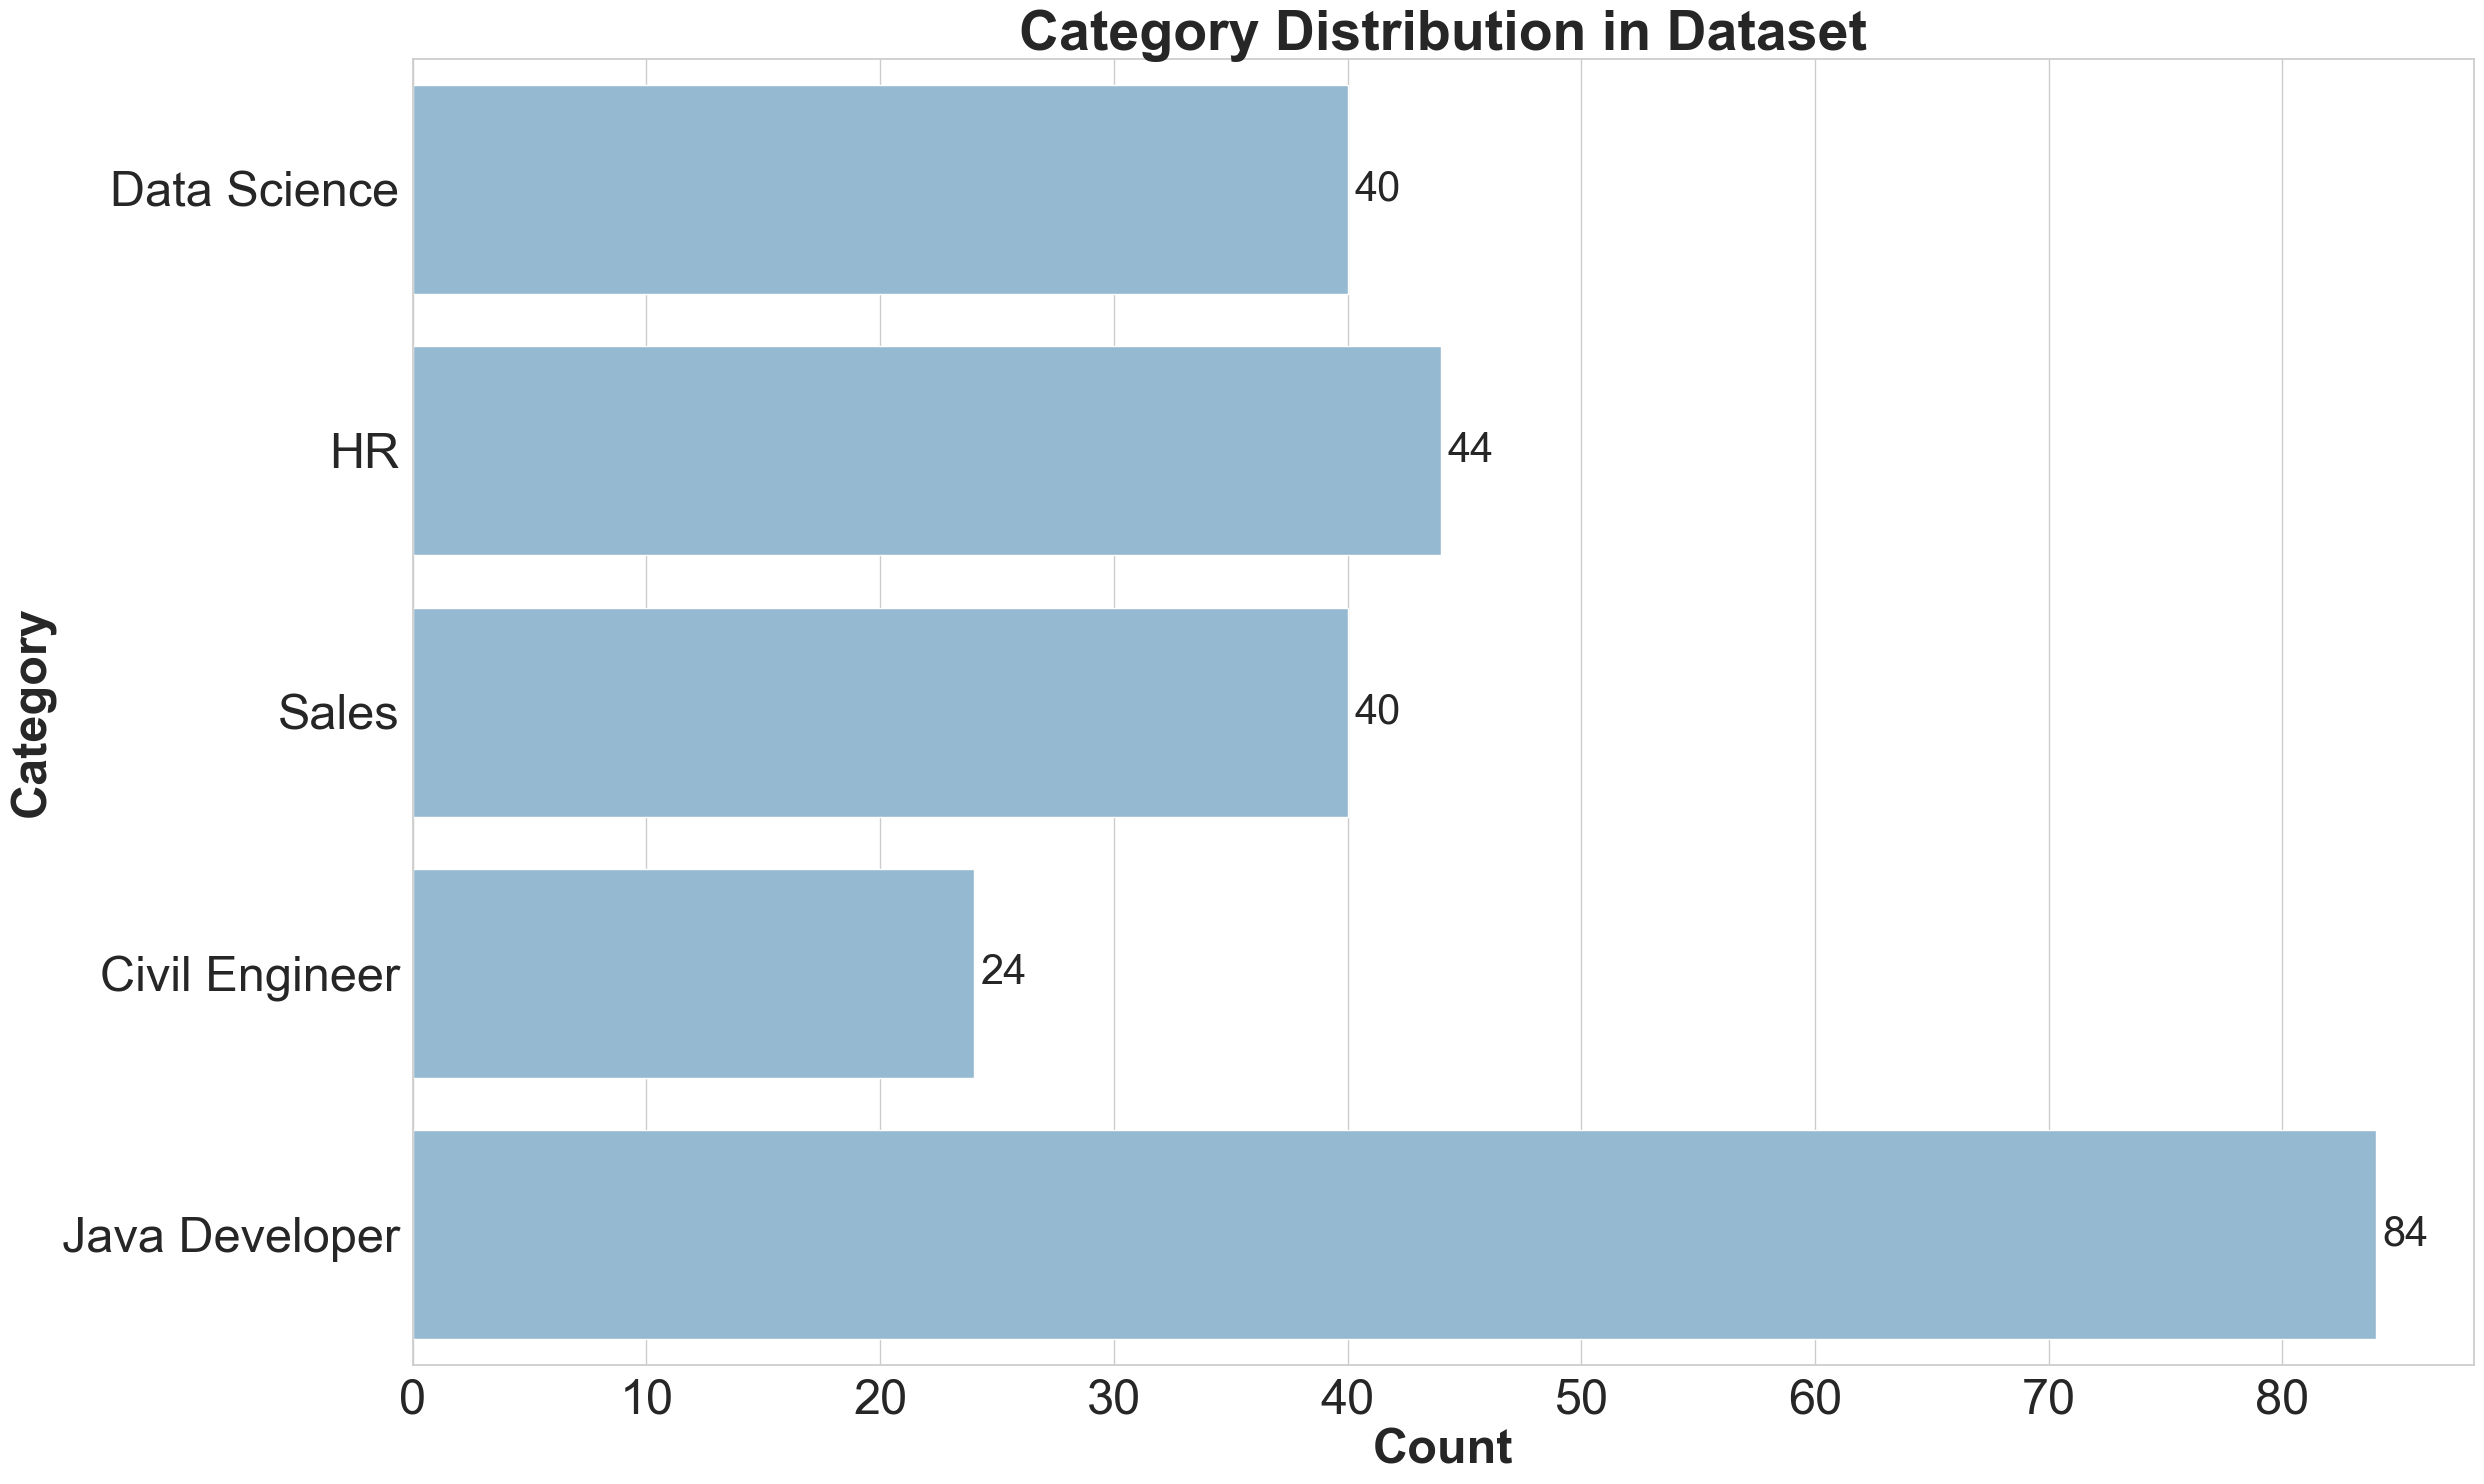

In [38]:
# Filter for selected categories
selected_categories = ['Data Science', 'HR', 'Sales', 'Java Developer', 'Civil Engineer']
filtered_df = df[df['Category'].isin(selected_categories)]

# Bar Plot
plt.figure(figsize=(25, 15))
sns.set_style("whitegrid")
sns.set_palette("Blues_d")

ax = sns.countplot(y='Category', data=filtered_df)
ax.set_title('Category Distribution in Dataset', fontsize=40, weight='bold')
ax.set_xlabel('Count', fontsize=35, weight='bold')
ax.set_ylabel('Category', fontsize=35, weight='bold')

# Make tick labels larger
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)

# Add exact count labels next to bars, larger font
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=30)

plt.tight_layout()
plt.show()

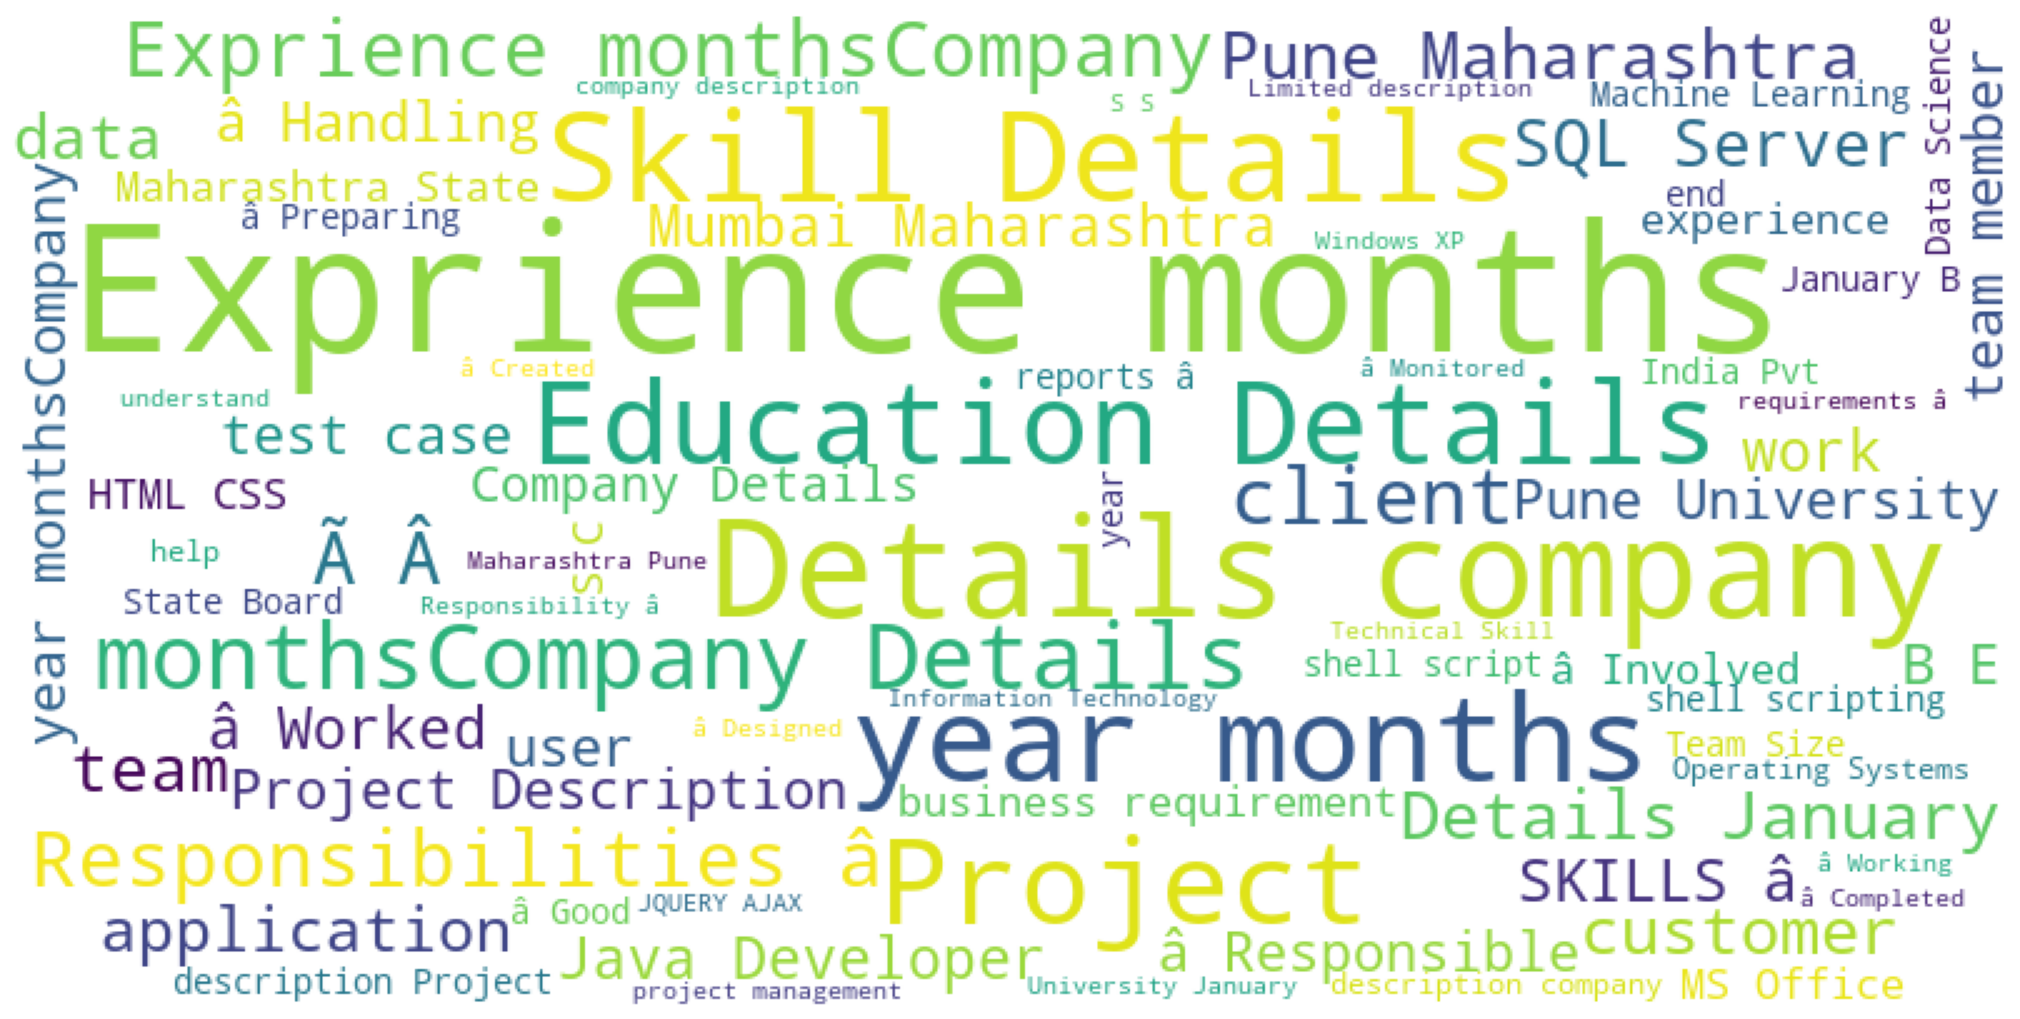

In [39]:
text = ' '.join(df['Resume'])

# Create the word cloud object for data science resumes
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', stopwords = set(CountVectorizer(stop_words='english').get_stop_words()), min_font_size = 10).generate(text)

# Display the generated image:
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

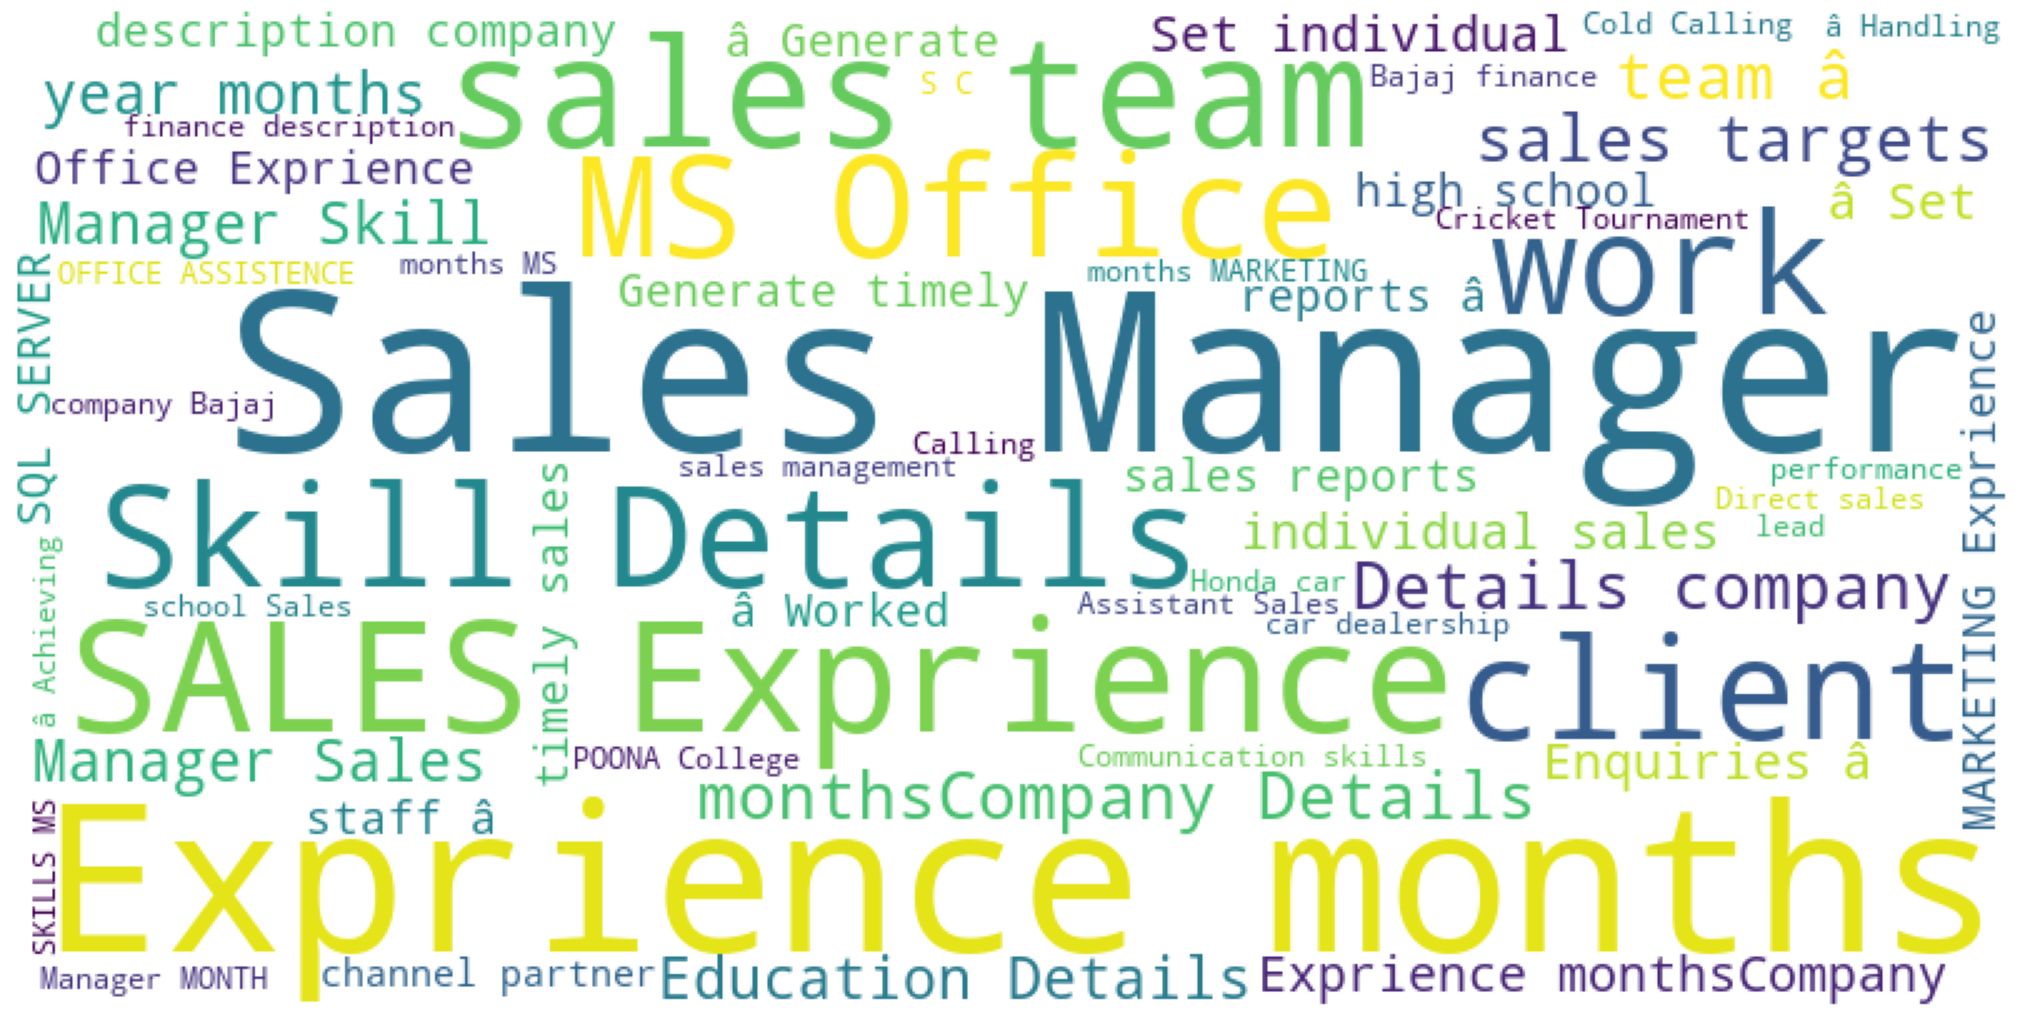

In [40]:
df1 = df[df['Category'] == "Sales"]
text = ' '.join(df1['Resume'])

# Create the word cloud object for data science resumes
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', stopwords = set(CountVectorizer(stop_words='english').get_stop_words()), min_font_size = 10).generate(text)

# Display the generated image:
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

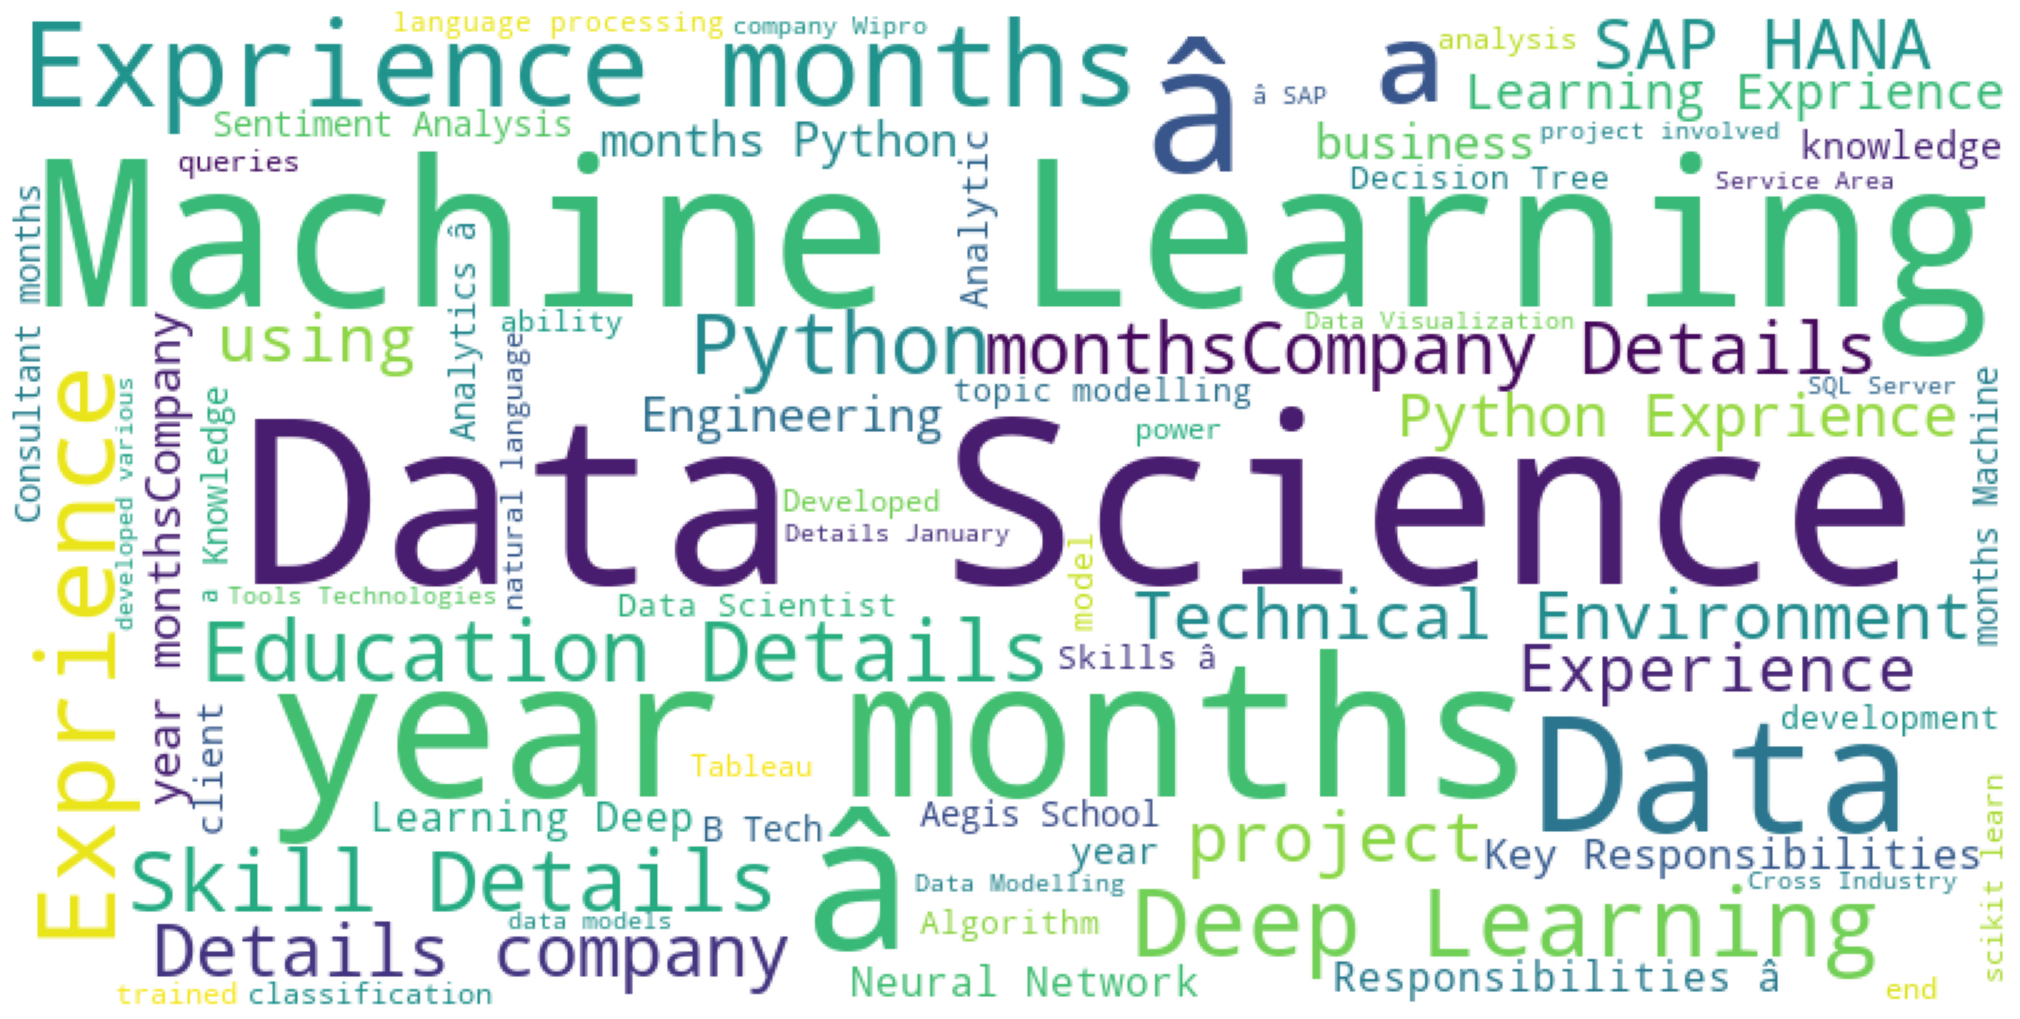

In [41]:
df1 = df[df['Category'] == "Data Science"]
text = ' '.join(df1['Resume'])

# Create the word cloud object for data science resumes
wordcloud = WordCloud(width = 800, height = 400, background_color ='white', stopwords = set(CountVectorizer(stop_words='english').get_stop_words()), min_font_size = 10).generate(text)

# Display the generated image:
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [42]:
df['resume_length_chars'] = df['Resume'].apply(len)
df['resume_length_words'] = df['Resume'].apply(lambda x: len(x.split()))

/var/folders/gz/04hcttt15mn53rcbh7h6xpj40000gn/T/ipykernel_21339/1712886160.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


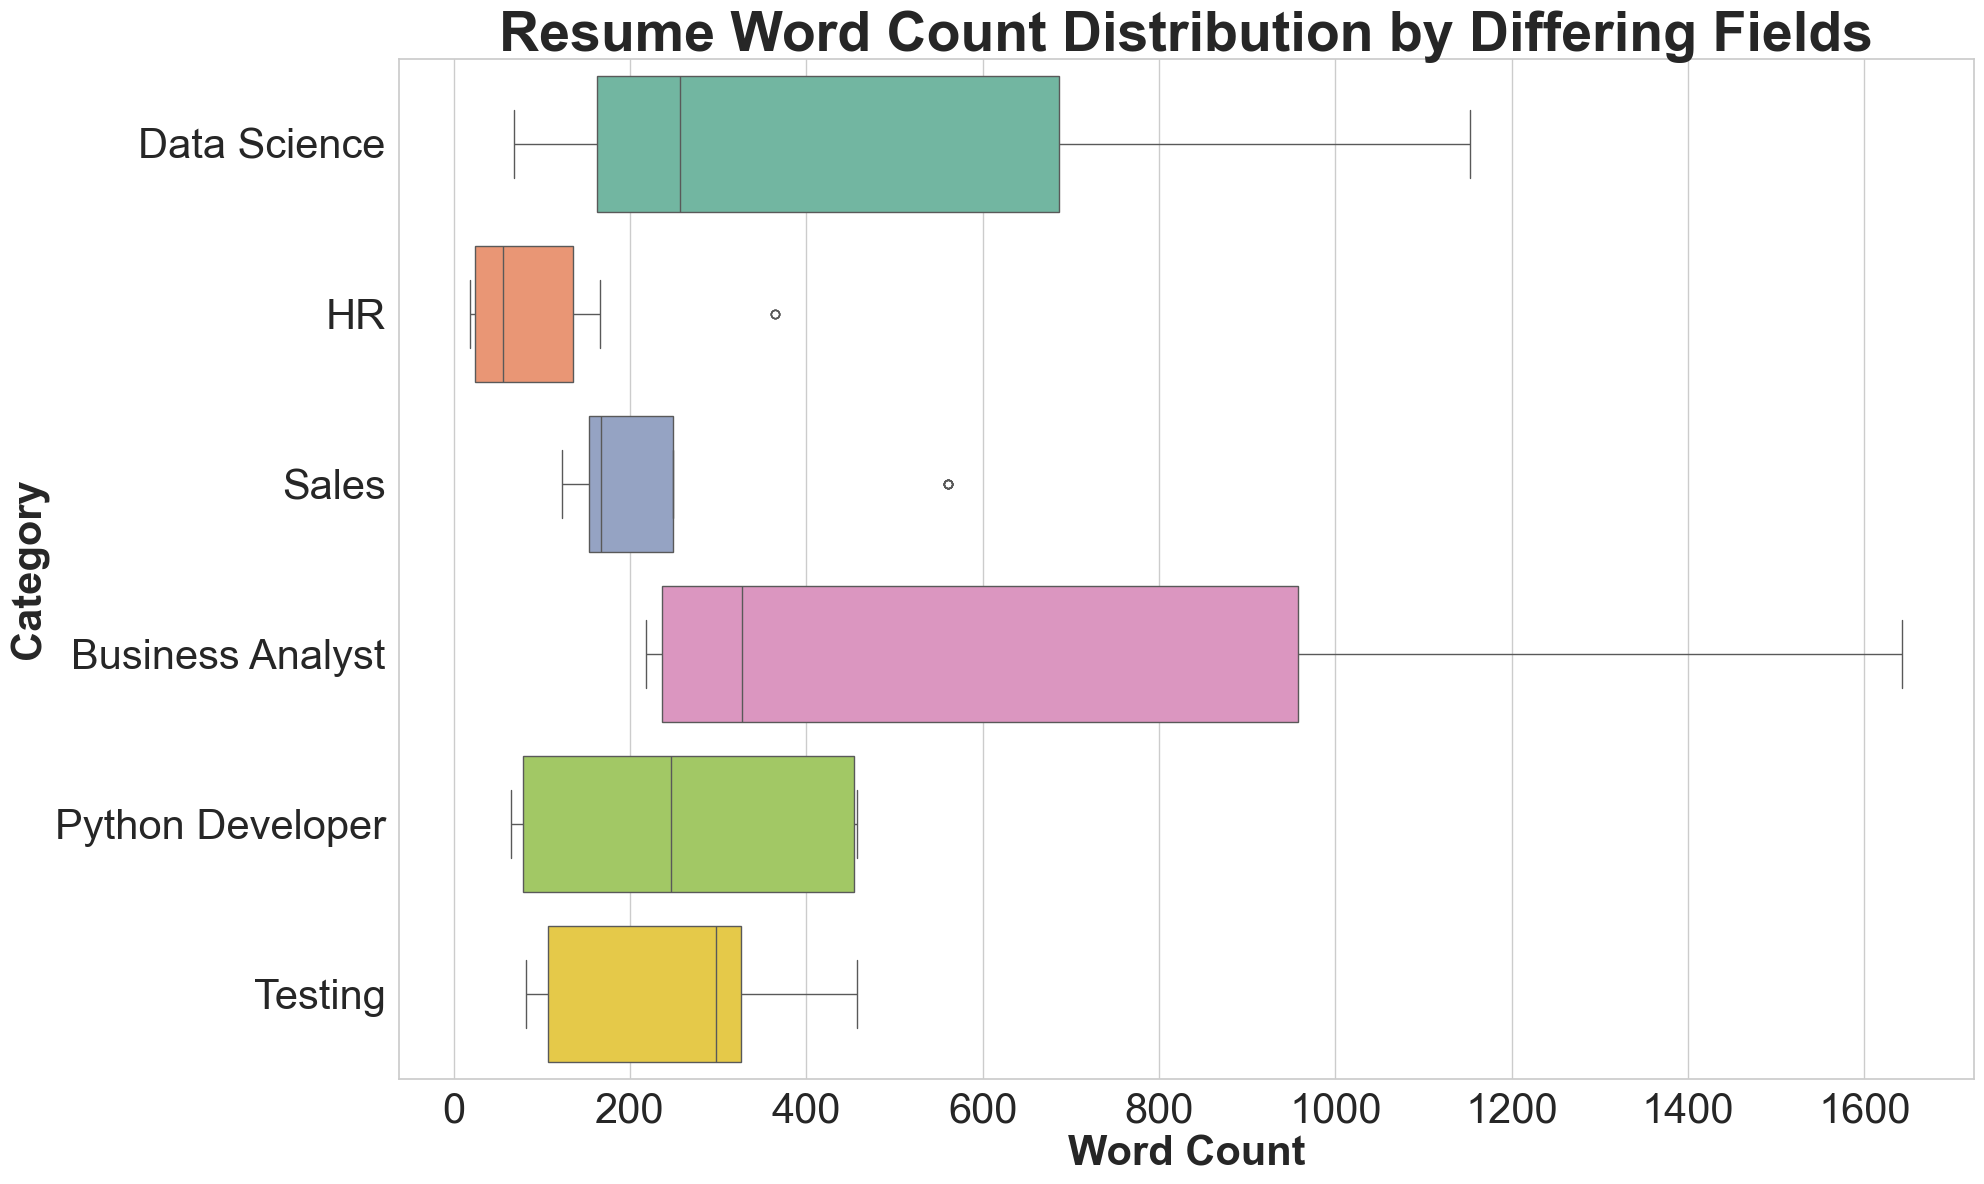

In [43]:
# Select very different fields manually
selected_categories = [
    'HR', 
    'Data Science', 
    'Python Developer', 
    'Sales', 
    'Testing', 
    'Business Analyst'
]

# Filter the DataFrame
df_selected = df[df['Category'].isin(selected_categories)]

# Plot
plt.figure(figsize=(20, 12))
sns.set_style("whitegrid")
sns.boxplot(
    x='resume_length_words', 
    y='Category', 
    data=df_selected, 
    palette="Set2"
)

# Titles and labels
plt.title('Resume Word Count Distribution by Differing Fields', fontsize=40, weight='bold')
plt.xlabel('Word Count', fontsize=30, weight='bold')
plt.ylabel('Category', fontsize=30, weight='bold')

# Make tick labels larger
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


/var/folders/gz/04hcttt15mn53rcbh7h6xpj40000gn/T/ipykernel_21339/2773405303.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="crest")


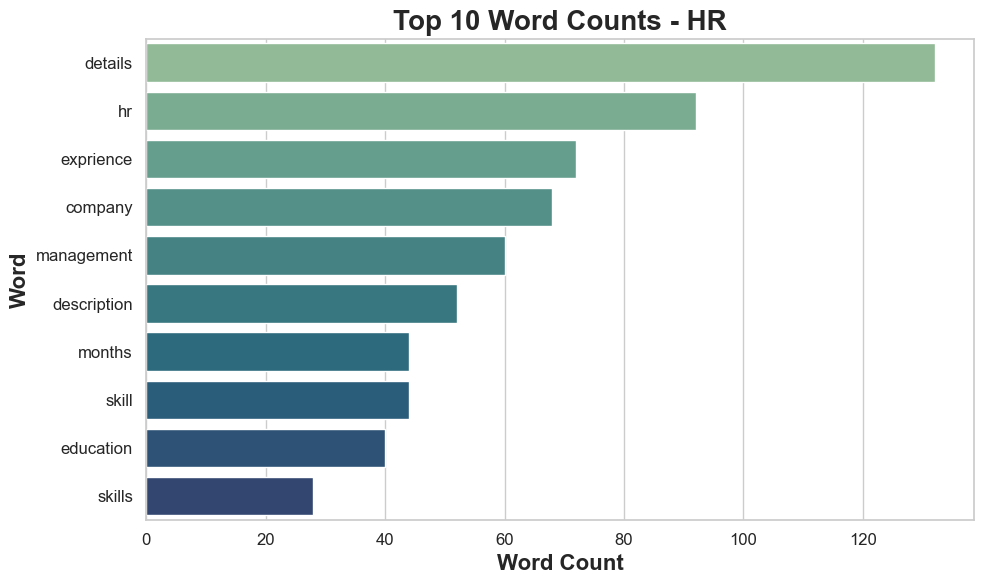

/var/folders/gz/04hcttt15mn53rcbh7h6xpj40000gn/T/ipykernel_21339/2773405303.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="crest")


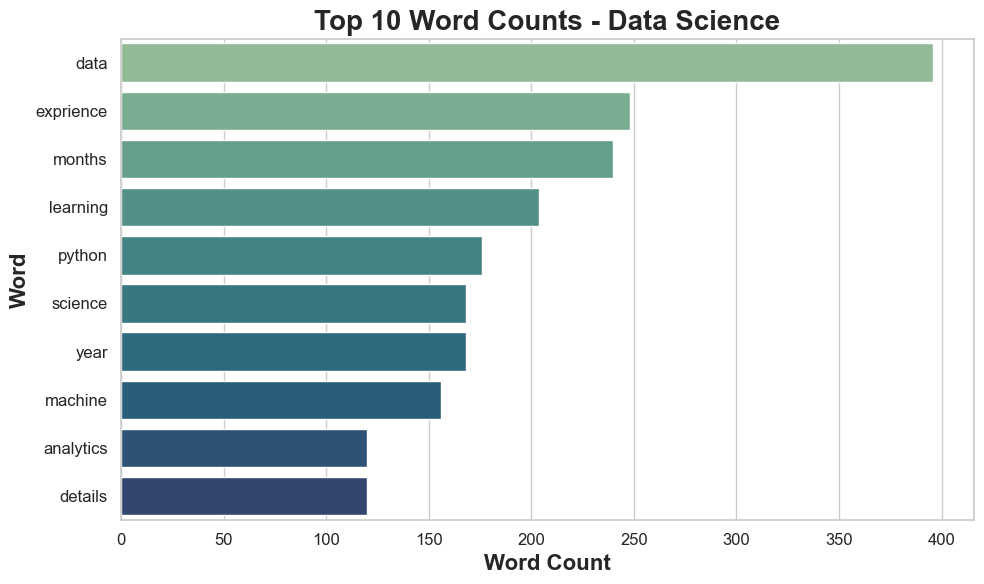

/var/folders/gz/04hcttt15mn53rcbh7h6xpj40000gn/T/ipykernel_21339/2773405303.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="crest")


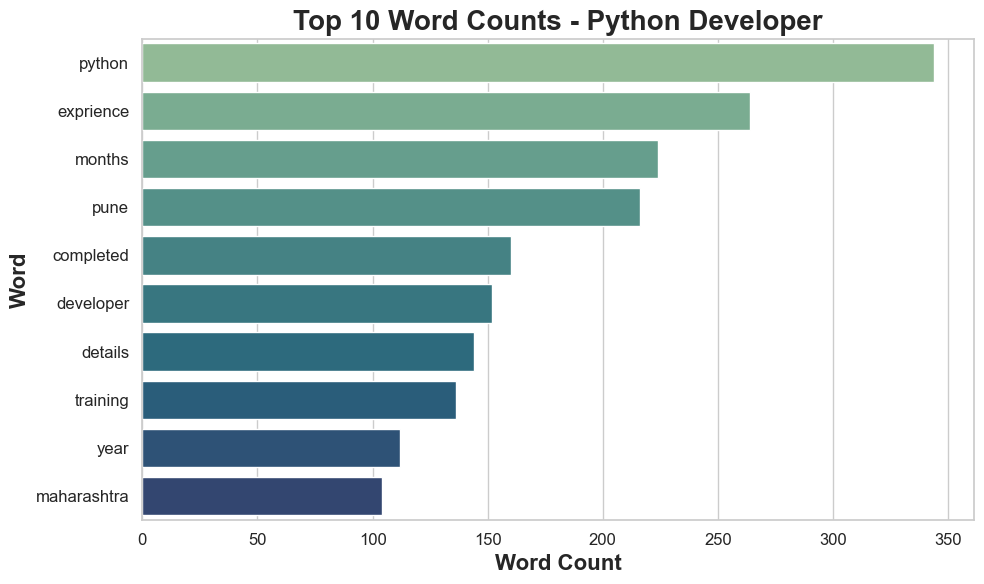

/var/folders/gz/04hcttt15mn53rcbh7h6xpj40000gn/T/ipykernel_21339/2773405303.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="crest")


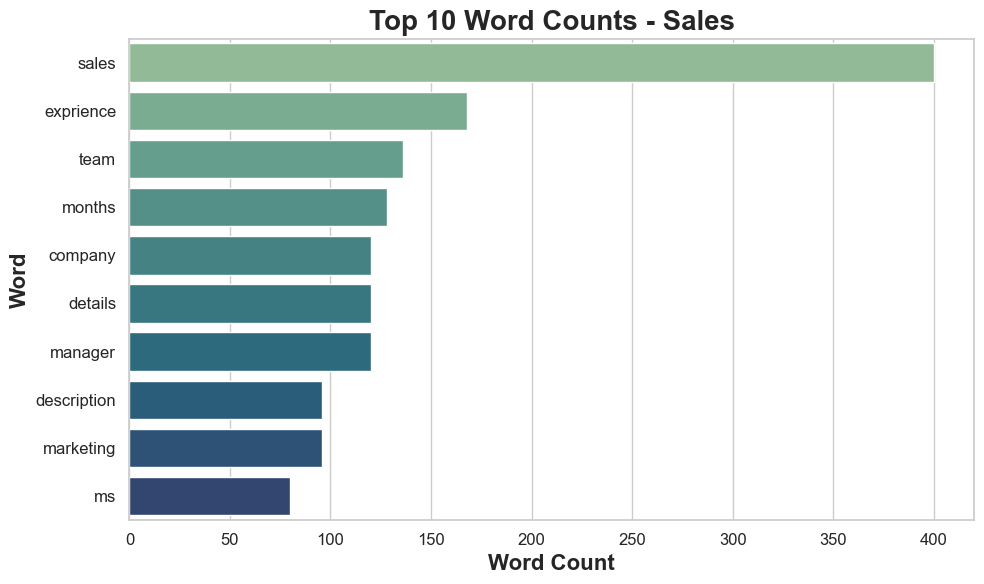

/var/folders/gz/04hcttt15mn53rcbh7h6xpj40000gn/T/ipykernel_21339/2773405303.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="crest")


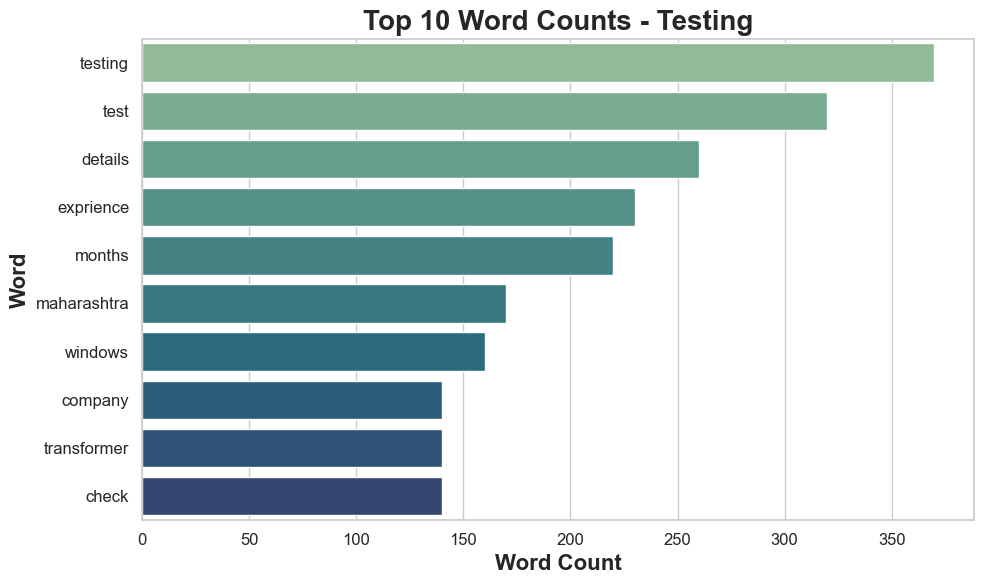

/var/folders/gz/04hcttt15mn53rcbh7h6xpj40000gn/T/ipykernel_21339/2773405303.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="crest")


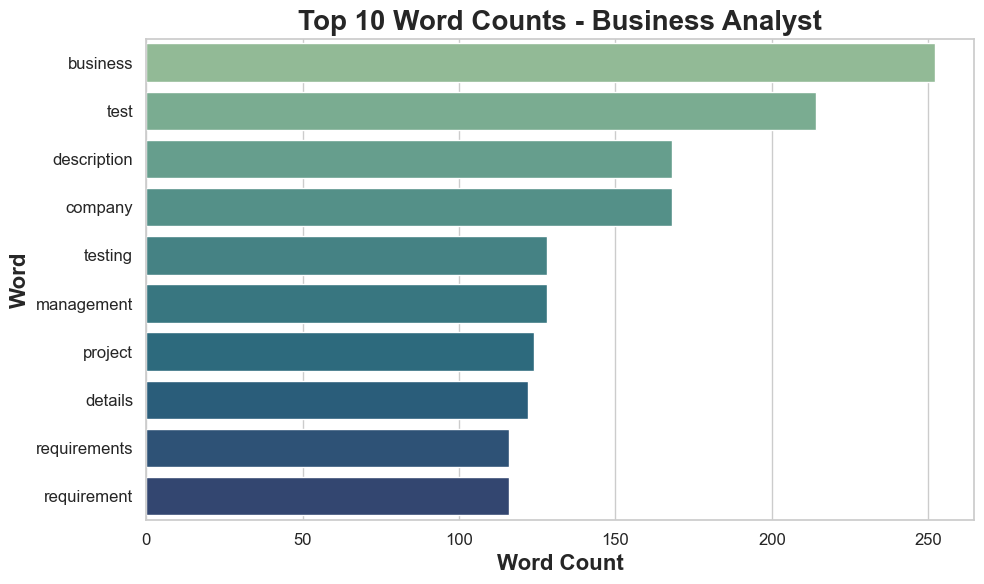

In [44]:
# Prepare corpus and labels
corpus = df_selected['Resume'].values
categories = df_selected['Category'].values

# Count Vectorizer (instead of TF-IDF)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(corpus)

# Convert to DataFrame
count_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_df['Category'] = categories

# Group by Category
category_counts = count_df.groupby('Category').sum()  # total word counts per category

# Function to plot Top Words
def plot_top_count_words(category_name, top_n=10):
    top_words = category_counts.loc[category_name].sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words.values, y=top_words.index, palette="crest")
    plt.title(f"Top {top_n} Word Counts - {category_name}", fontsize=20, weight='bold')
    plt.xlabel('Word Count', fontsize=16, weight='bold')
    plt.ylabel('Word', fontsize=16, weight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# Plot Top Words for Each Selected Category
for category in selected_categories:
    plot_top_count_words(category)

### 1.5 Data Cleaning

In [45]:
# Data Cleaning Function
# Cleans URLs, Hashtags, Mentions, Special letters, and Punctuation in the Resume column
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt) # remove URLs
    cleanText = re.sub('RT|cc', ' ', cleanText) # remove RT and cc
    cleanText = re.sub('#\S+\s', ' ', cleanText) # remove hashtags
    cleanText = re.sub('@\S+', '  ', cleanText) # remove mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) # remove punctuations
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText) # remove extra whitespaces
    return cleanText

In [46]:
# Apply cleaning function to dataset
df['Cleaned_Resume'] = df['Resume'].apply(cleanResume)

In [47]:
# Get rid of original
df_cleaned = df.drop('Resume', axis = 1)

# Rename cleaned column
df_cleaned = df_cleaned.rename(columns = {'Cleaned_Resume': 'Resume'})

In [48]:
df_cleaned

Category  resume_length_chars  resume_length_words  \
0    Data Science                 4786                  670   
1    Data Science                 1268                  163   
2    Data Science                 1871                  265   
3    Data Science                 6995                  993   
4    Data Science                  452                   69   
..            ...                  ...                  ...   
957       Testing                 2130                  326   
958       Testing                 2306                  323   
959       Testing                 3319                  457   
960       Testing                  767                  107   
961       Testing                 1955                  248   

                                                Resume  
0    Skills Programming Languages Python pandas num...  
1    Education Details May 2013 to May 2017 B E UIT...  
2    Areas of Interest Deep Learning Control System...  
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4    Education Details MCA YMCAUST Faridabad Haryan...  
..                                                 ...  
957  Computer Skills Proficient in MS office Word B...  
958   Willingness to a ept the challenges Positive ...  
959  PERSONAL SKILLS Quick learner Eagerness to lea...  
960  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...  
961  Skill Set OS Windows XP 7 8 8 1 10 Database MY...  

[962 rows x 4 columns]

## 2. Modeling

### 2.1 Encoding Categorical Data

In [49]:
le = LabelEncoder()
df_cleaned["Category"] = le.fit_transform(df_cleaned["Category"])
df["Category"]

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

### 2.2 Vectorize Resume Strings into Numeric Values

In [50]:
tfidf = TfidfVectorizer(stop_words="english")
text_vectorized = tfidf.fit_transform(df_cleaned["Resume"])

### 2.3 Split the Dataset into Training and Test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(text_vectorized, df_cleaned['Category'], test_size=0.2, random_state= 207)

### 2.4 Predict and Evaluate Model

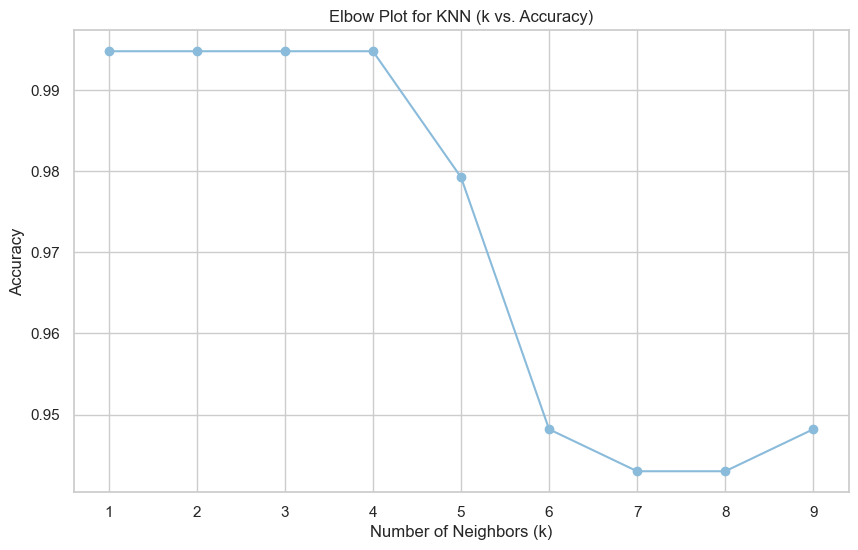

In [52]:
# Range of k values to test
k_range = range(1, 10)
accuracies = []

# Loop over k values
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('Elbow Plot for KNN (k vs. Accuracy)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Anywhere between 3-6 neighbors should be ideal.

In [53]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = model.predict(X_test) 

print(f"Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9948186528497409


### 2.5 Visualize Model


/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


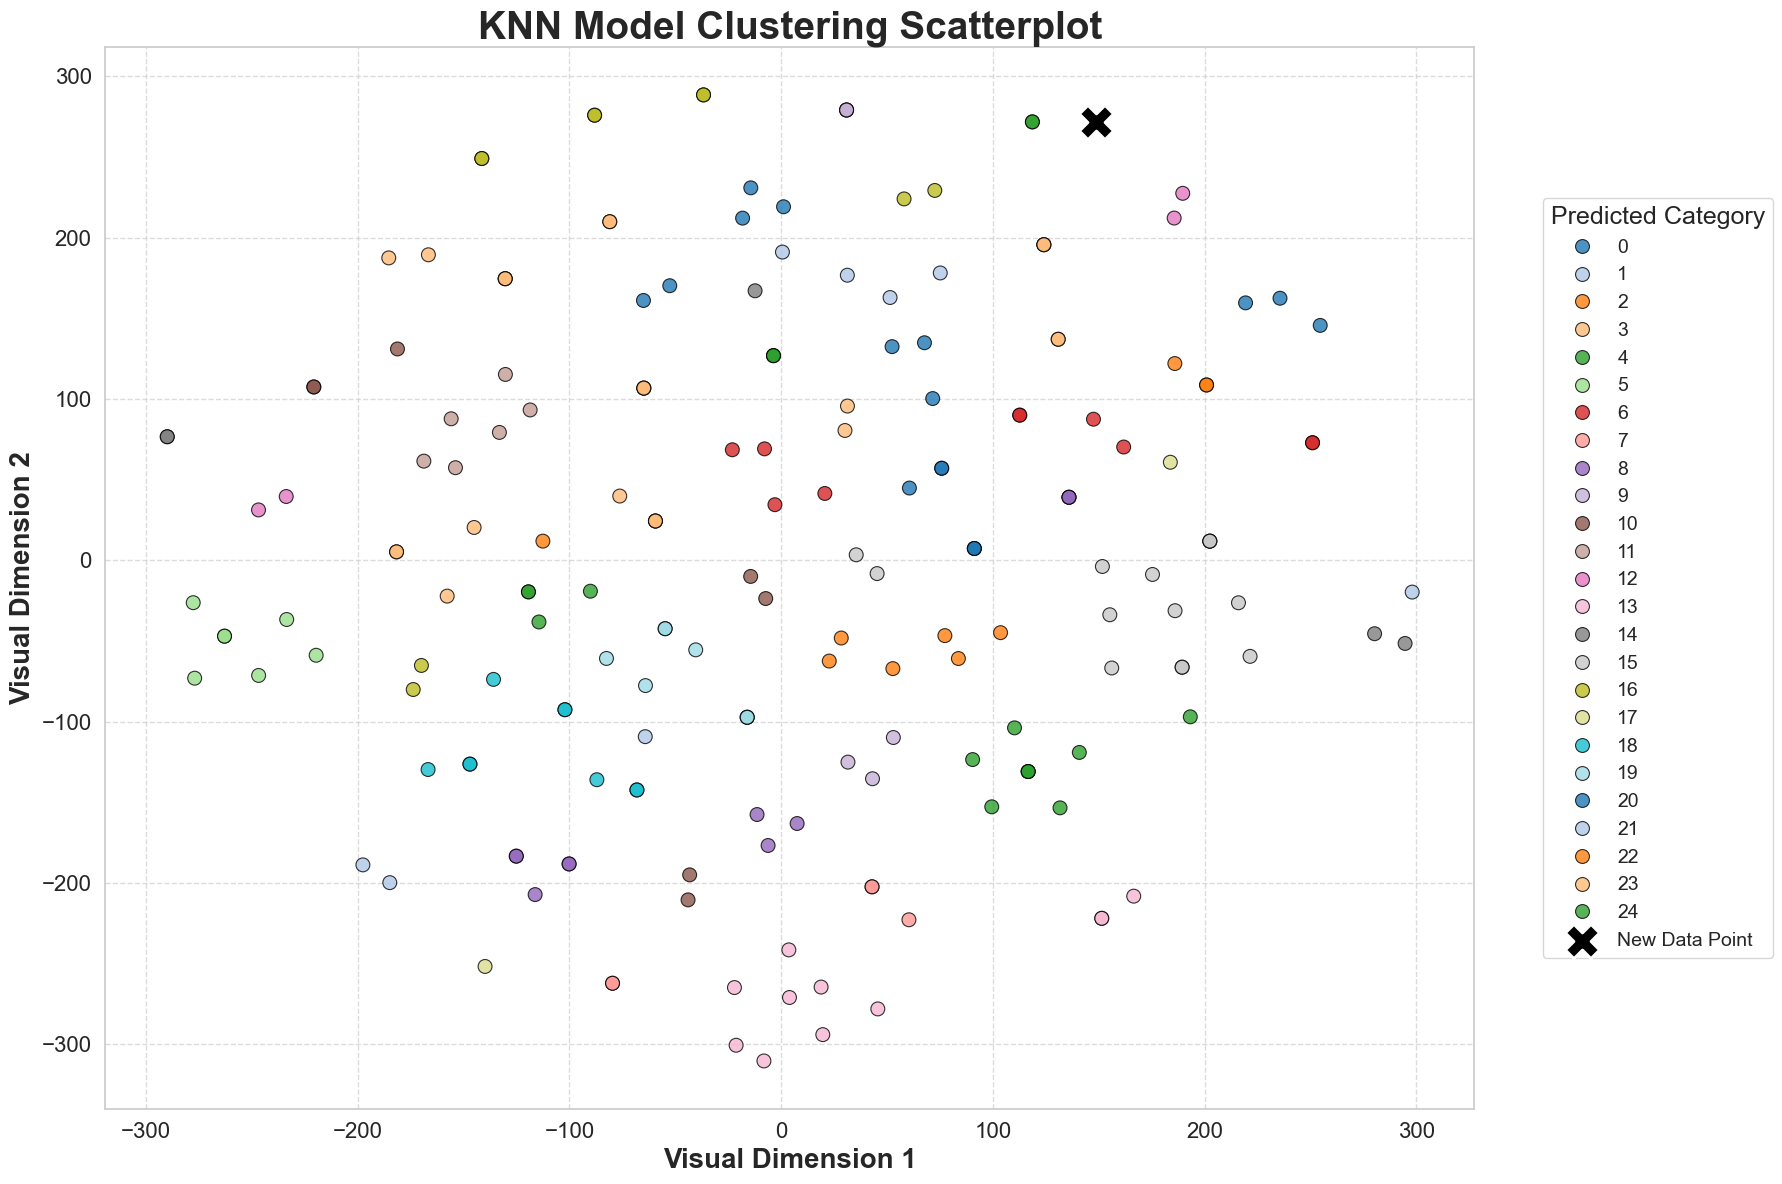

In [55]:
# t-SNE (assuming you have X_test and y_pred)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_test_tsne = tsne.fit_transform(X_test.toarray())

# Pick a random point you want to highlight
highlight_idx = 50  # you can pick any index
highlight_x = X_test_tsne[highlight_idx, 0] + 30
highlight_y = X_test_tsne[highlight_idx, 1]

# Plot
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

# Regular points
scatter = sns.scatterplot(
    x=X_test_tsne[:, 0],
    y=X_test_tsne[:, 1],
    hue=y_pred,
    palette="tab20",
    s=100,
    edgecolor='black',
    alpha=0.8
)

# Big black highlighted point
plt.scatter(
    highlight_x, highlight_y, 
    color='black', 
    s=600,       # BIG size
    marker='X',  # Cool X marker
    edgecolor='white',
    linewidth=2,
    label='New Data Point'
)

# Titles and labels
plt.title('KNN Model Clustering Scatterplot', fontsize=28, weight='bold')
plt.xlabel('Visual Dimension 1', fontsize=20, weight='bold')
plt.ylabel('Visual Dimension 2', fontsize=20, weight='bold')

# Legend settings
plt.legend(
    title='Predicted Category',
    title_fontsize=18,
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    fontsize=14,
    borderaxespad=0,
    frameon=True
)

# Ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Grid
plt.grid(True, linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()

plt.show()

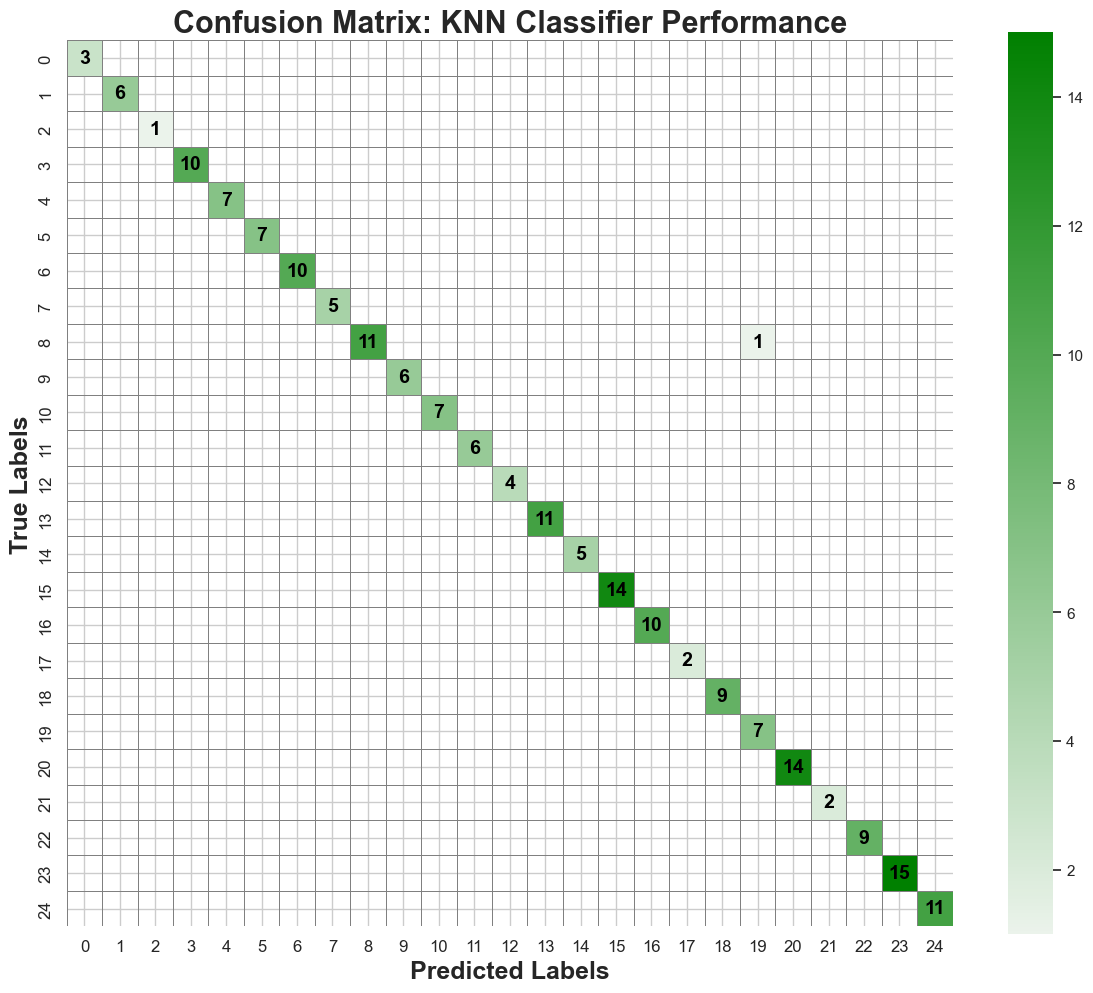

In [56]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

# Custom mask to hide 0s
mask = (cm == 0)

# Create heatmap
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap = sns.light_palette("green", as_cmap=True), 
    cbar=True, 
    linewidths=0.5, 
    linecolor='gray',
    mask=mask, 
    square=True,
    annot_kws={"size": 14, "weight": "bold", "color": "black"}
)

# Title and axis labels
plt.title('Confusion Matrix: KNN Classifier Performance', fontsize=22, weight='bold')
plt.xlabel('Predicted Labels', fontsize=18, weight='bold')
plt.ylabel('True Labels', fontsize=18, weight='bold')

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save for slides
plt.tight_layout()
plt.show()

## 3. Predicting New Resumes

In [57]:
import pickle

# pickle.dump(tfidf, open('tfidf.pkl','wb'))
# pickle.dump(model, open('clf.pkl', 'wb'))

In [58]:
myresume = "I am a Java Developer. I have many technical skills that are useful."

In [59]:
# Load the trained classifier and label encoder
knn = pickle.load(open("../pkl files/clf.pkl", "rb"))
tfidf = pickle.load(open("../pkl files/tfidf.pkl", "rb"))
label_encoder = pickle.load(open("../pkl files/label_encoder.pkl", "rb")) 

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = knn.predict(input_features)[0]

# Efficient category mapping using LabelEncoder
category_name = label_encoder.inverse_transform([prediction_id])[0]

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Java Developer
15
